<a href="https://colab.research.google.com/github/Shyams728/copper_ml_project/blob/main/copper_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
from scipy.stats import skew

In [ ]:
Main_df = pd.read_excel(r'/content/drive/MyDrive/data/processed_Copper_Set_cleaned.xlsx')

In [ ]:
Main_df.sample(5)

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
167617,2020-07-22,29.150752,30288891,84,Won,S,15,15.00,1500.0,640405,2020-09-01,562.0
12421,2021-03-17,151.583671,30217607,27,Won,S,10,2.00,1250.0,1668701718,2021-08-01,969.0
99237,2020-11-20,12.061096,30201846,25,Won,S,10,1.00,1500.0,628377,2021-01-01,655.0
108303,2020-11-06,54.140941,30230331,80,Won,S,10,10.00,1500.0,640665,2020-12-01,580.0
120230,2020-10-20,19.654661,30202377,32,Won,S,56,2.31,906.0,1670798778,2020-07-01,603.0


In [ ]:
catagory_columns = ['country_code', 'customer_code', 'application', 'product_ref']
Main_df[catagory_columns] = Main_df[catagory_columns].apply(lambda x: x.astype('category'))

In [ ]:
# Display basic information about the dataset
Main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181664 entries, 0 to 181663
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181664 non-null  datetime64[ns]
 1   quantity_tons  181664 non-null  float64       
 2   customer_code  181664 non-null  category      
 3   country_code   181664 non-null  category      
 4   status         181664 non-null  object        
 5   item_type      181664 non-null  object        
 6   application    181664 non-null  category      
 7   thickness      181664 non-null  float64       
 8   width          181664 non-null  float64       
 9   product_ref    181664 non-null  category      
 10  delivery_date  181664 non-null  datetime64[ns]
 11  selling_price  181664 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), object(2)
memory usage: 12.0+ MB


In [ ]:
# Display descriptive statistics
Main_df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181664,2020-11-26 22:57:40.806764032,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181664.0,5875.235595,0.00001,10.970298,30.364635,67.161335,1000000000.0,2349132.964627
thickness,181664.0,2.564877,0.18,0.7,1.5,3.0,2500.0,6.572458
width,181664.0,1295.292755,1.0,1180.0,1250.0,1500.0,2990.0,261.632547
delivery_date,181664,2021-01-25 22:44:25.598027008,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181664.0,1918.084008,-1160.0,669.0,812.0,953.0,100001015.0,331802.948131


In [ ]:
Main_df.describe(include=['category','object']).T

,count,unique,top,freq
customer_code,181664,1169,30157111,4988
country_code,181664,18,78,32084
status,181664,9,Won,116007
item_type,181664,7,W,105611
application,181664,30,10,77561
product_ref,181664,33,611993,45723


In [ ]:
df = Main_df.copy()

In [ ]:
numeric_columns = df.select_dtypes(include='number',).columns
numeric_columns[0:-1]

Index(['quantity_tons', 'thickness', 'width'], dtype='object')

have glipse of outliers count based on IQR method considaration

In [ ]:
print('total number of samples : ',len(df),"\n")


for col in numeric_columns:
    # Count outliers before clipping
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f'outliers from {col} : ',len(outliers))


total number of samples :  181664 

outliers from quantity_tons :  20954
outliers from thickness :  13959
outliers from width :  10948
outliers from selling_price :  4877


size of the outliers are high found out the clipiing outlier still not remove the skiwness of the data
according to previous triels

for selling price outliers are minimal but skiewness to found

For regression targets with outliers, clipping extreme values or winsorizing can improve model fitting. But do this cautiously.

Applying power or log transforms to skewed regression targets can make the relationship more linear and improve predictions.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


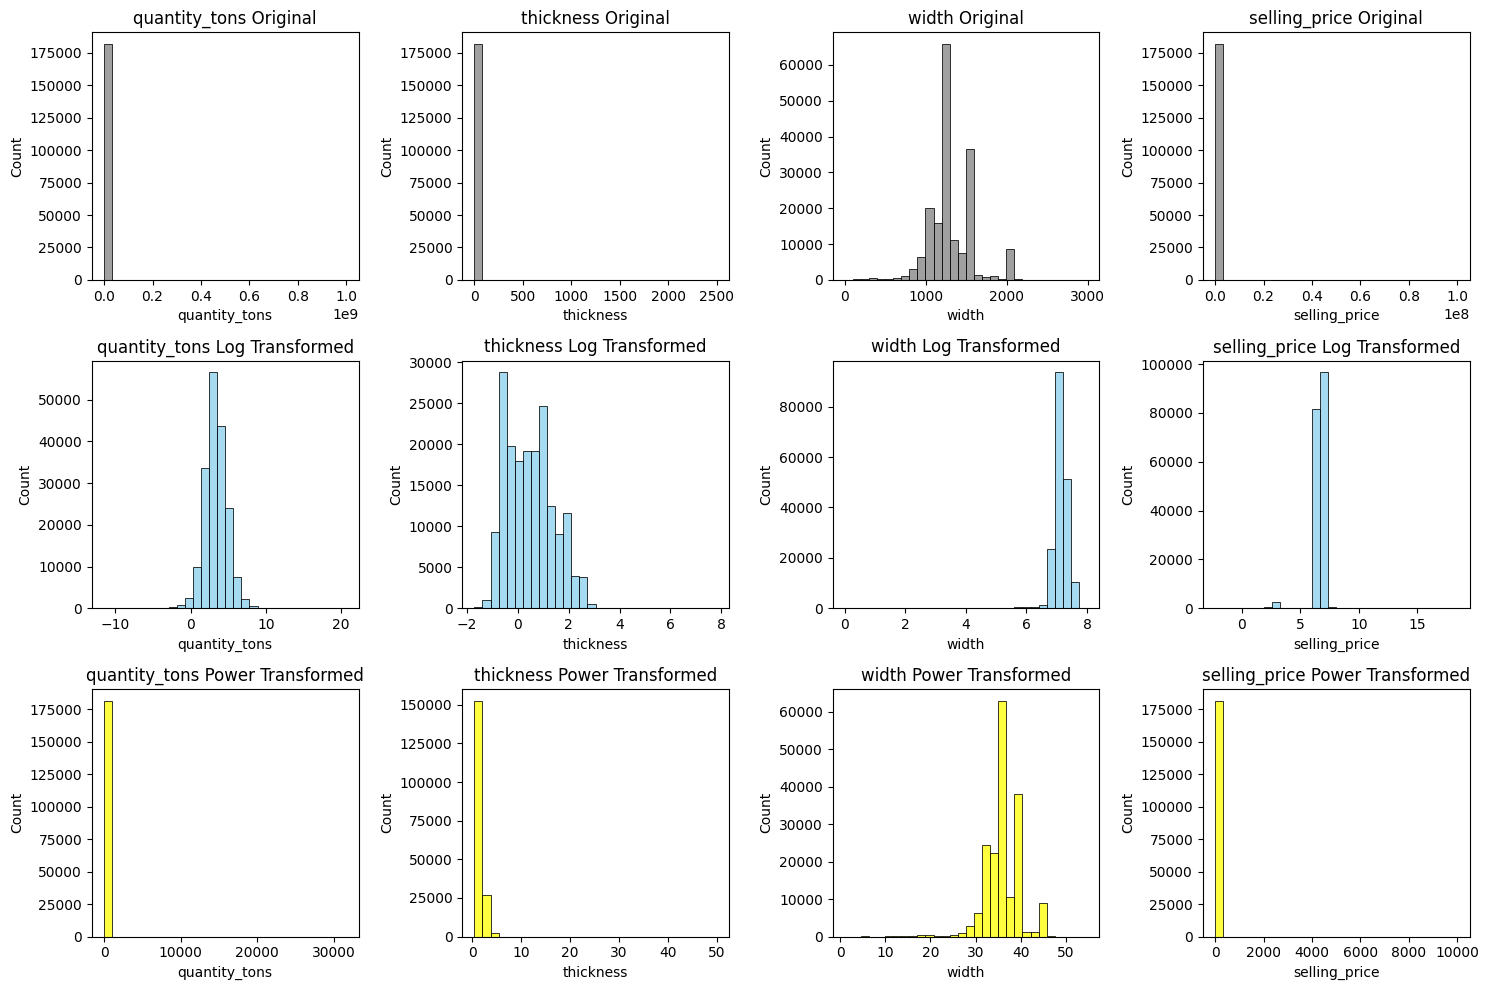

In [ ]:
num_plots = len(numeric_columns)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):

    # Plot original histogram
    plt.subplot(3, num_plots, i)
    sns.histplot(df[col], kde=False, bins=30, color='grey')
    plt.title(f'{col} Original')

    # Log transform
    log_data = np.log(df[col])

    # Plot log transformed histogram
    plt.subplot(3, num_plots, num_plots + i)
    sns.histplot(log_data, bins=30, color='skyblue')
    plt.title(f'{col} Log Transformed')

    # Power transform
    power_data = df[col]**(1/2)

    # Plot power transformed histogram
    plt.subplot(3, num_plots, 2*num_plots + i)
    sns.histplot(power_data, bins=30, color='yellow')
    plt.title(f'{col} Power Transformed')

plt.tight_layout()
plt.show()

log transformation will remove heavily skewed data removes long tails

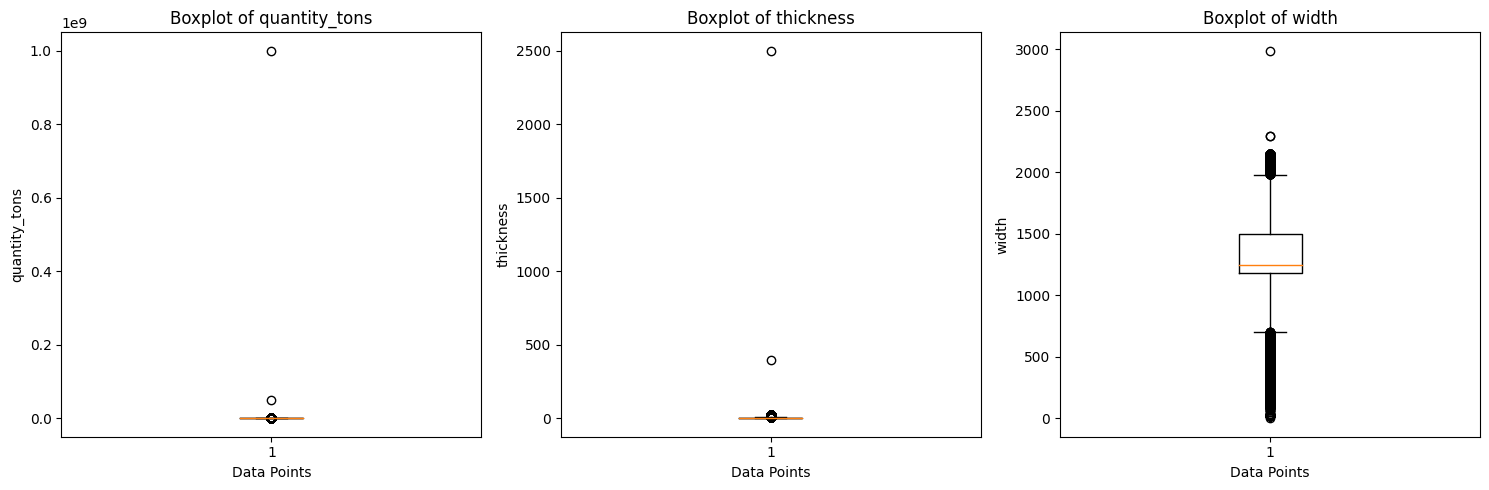

In [ ]:
# Create a single figure with subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_columns, 1):  # Start index from 1

    # Plot boxplot
    plt.subplot(1, len(numeric_columns), i)
    plt.boxplot(df[col])
    # plt.violinplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
for col in numeric_columns:
    # Count and display the number of zero or negative values in the current column
    num_zero_negative_values = (df[col] <= 0).sum()
    print(f'Column "{col}": {num_zero_negative_values} zero or negative values')

    valid_rows = df[col] > 0
    df[f'log_trans_{col}'] = np.log(df.loc[valid_rows, col])


Column "quantity_tons": 0 zero or negative values
Column "thickness": 0 zero or negative values
Column "width": 0 zero or negative values


In [ ]:
df.sample(5)

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,log_trans_quantity_tons,log_trans_thickness,log_trans_width,log_trans_selling_price
124749,2020-10-13,2207.157177,30166496,26,Lost,S,42,2.00,1300.0,1668701725,2021-01-01,780.0,7.699461,0.693147,7.170120,6.659294
32736,2021-02-24,9.546369,30198761,26,Won,W,10,2.50,1200.0,611993,2021-07-01,1101.0,2.256161,0.916291,7.090077,7.003974
164429,2020-07-29,42.451069,30155824,25,Won,W,10,0.68,1250.0,611993,2020-07-01,1207.0,3.748352,-0.385662,7.130899,7.095893
119864,2020-10-20,25.877487,30272503,28,Won,S,38,0.50,1250.0,611993,2021-01-01,779.0,3.253373,-0.693147,7.130899,6.658011
157180,2020-08-19,109.577136,30205242,25,Won,W,28,1.15,910.0,628377,2020-10-01,530.0,4.696629,0.139762,6.813445,6.272877


to know thhe data distribution of numerical data

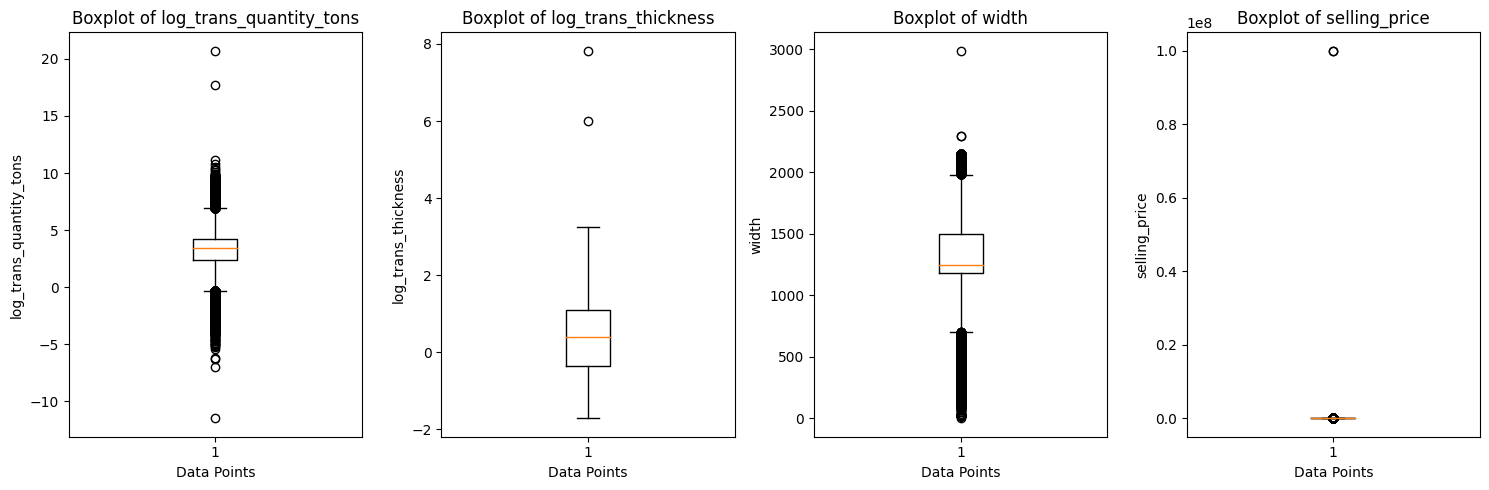

In [ ]:
log_tran_col = ['log_trans_quantity_tons',	'log_trans_thickness',	'width',	'selling_price']

# Create a single figure with subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(log_tran_col, 1):  # Start index from 1

    # Plot boxplot
    plt.subplot(1, len(log_tran_col), i)
    plt.boxplot(df[col])
    # plt.violinplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
# Function to clip values in specified columns based on quantiles and count outliers
def clip_and_count_outliers(df, clip_quantiles):
    # Make a copy of the original DataFrame
    data = df.copy()
    # Dictionary to store outlier information for each numerical column
    outliers = {}
    log_tran_col = ['log_trans_quantity_tons',	'log_trans_thickness',	'width',	'selling_price']
    # Loop through numerical columns in the DataFrame
    for col in log_tran_col:
        # Count outliers before clipping
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        num_outliers_before_clip = len(data[(data[col] > upper_bound) | (data[col] < lower_bound)])

        # Clip values based on specified quantiles
        data[col] = data[col].clip(upper=data[col].quantile(clip_quantiles.get('upper', 1)),
                                   lower=data[col].quantile(clip_quantiles.get('lower', 0)))

        # Count outliers after clipping
        num_outliers_after_clip = len(data[(data[col] > upper_bound) | (data[col] < lower_bound)])

        # Calculate percentage of outliers before clipping
        percent_outliers_before_clip = (num_outliers_before_clip / len(data)) * 100

        # Calculate percentage of outliers after clipping
        percent_outliers_after_clip = (num_outliers_after_clip / len(data)) * 100

        # Store outlier information in the dictionary
        outliers[col] = {
            'count_before_clip': num_outliers_before_clip,
            'percent_before_clip': f'{percent_outliers_before_clip:.2f}%',  # Include percentage before clip
            'count_after_clip': num_outliers_after_clip,
            'percent_after_clip': f'{percent_outliers_after_clip:.2f}%'  # Include percentage after clip
        }

    # Return the clipped DataFrame and the outliers information
    return data, outliers

# Function to remove outliers using Isolation Forest
def remove_outliers_isolation_forest(df, contamination=0.05):
    # Make a copy of the original DataFrame
    data = df.copy()
    # Dictionary to store outlier information for each numerical column
    outliers = {}

    # Isolation Forest for outlier detection
    for col in log_tran_col:
        # Fit the Isolation Forest model to the numeric column
        model = IsolationForest(contamination=contamination)
        model.fit(data[[col]])

        # Identify outliers
        outliers_before_removal = model.predict(data[[col]]) == -1
        num_outliers_before_removal = sum(outliers_before_removal)

        # Remove outliers
        data = data[~outliers_before_removal]

        # Identify outliers after removal
        outliers_after_removal = model.predict(data[[col]]) == -1
        num_outliers_after_removal = sum(outliers_after_removal)

        # Store outlier information in the dictionary
        outliers[col] = {
            'count_before_removal': num_outliers_before_removal,
            'percent_before_removal': f'{(num_outliers_before_removal / len(df)) * 100:.2f}%',
            'count_after_removal': num_outliers_after_removal,
            'percent_after_removal': f'{(num_outliers_after_removal / len(data)) * 100:.2f}%'
        }

    # Return the DataFrame after removing outliers and the outliers information
    return data, outliers


In [ ]:
print('total number of samples : ',len(df))

total number of samples :  181664


Isolation Forest is most robost unsupervised learning method use isolation forests to find anomalies and remove only the most extreme outliers

In [ ]:
# Remove outliers using Isolation Forest
contamination = 0.01
filtered_data, outliers_info_iso = remove_outliers_isolation_forest(df, contamination)


print("Isolation Forest:")
for col, info in outliers_info_iso.items():
    print(f"{col}:")
    print(f"Count of outliers before removal: {info['count_before_removal']}")
    print(f"Percentage of outliers before removal: {info['percent_before_removal']}")
    print(f"Count of outliers after removal: {info['count_after_removal']}")
    print(f"Percentage of outliers after removal: {info['percent_after_removal']}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest:
log_trans_quantity_tons:
Count of outliers before removal: 1814
Percentage of outliers before removal: 1.00%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%

log_trans_thickness:
Count of outliers before removal: 1792
Percentage of outliers before removal: 0.99%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%

width:
Count of outliers before removal: 1746
Percentage of outliers before removal: 0.96%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%

selling_price:
Count of outliers before removal: 1676
Percentage of outliers before removal: 0.92%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%



In [ ]:
# Clip outliers using IQR
clip_quantiles = {'upper': 0.90, 'lower': 0.01}
clipped_data, outliers_info_clip = clip_and_count_outliers(filtered_data, clip_quantiles)

# Display outliers information for both methods
print("IQR Clipping:")
for col, info in outliers_info_clip.items():
    print(f"{col}:")
    print(f"Count of outliers before clip: {info['count_before_clip']}")
    print(f"Percentage of outliers before clip: {info['percent_before_clip']}")
    print(f"Count of outliers after clip: {info['count_after_clip']}")
    print(f"Percentage of outliers after clip: {info['percent_after_clip']}")
    print()

IQR Clipping:
log_trans_quantity_tons:
Count of outliers before clip: 2501
Percentage of outliers before clip: 1.43%
Count of outliers after clip: 0
Percentage of outliers after clip: 0.00%

log_trans_thickness:
Count of outliers before clip: 0
Percentage of outliers before clip: 0.00%
Count of outliers after clip: 0
Percentage of outliers after clip: 0.00%

width:
Count of outliers before clip: 9188
Percentage of outliers before clip: 5.26%
Count of outliers after clip: 0
Percentage of outliers after clip: 0.00%

selling_price:
Count of outliers before clip: 2905
Percentage of outliers before clip: 1.66%
Count of outliers after clip: 1803
Percentage of outliers after clip: 1.03%



stratify is balencing
k-fold cross validation
smoot
dt models are not sensitive to outliers
central something thiorem

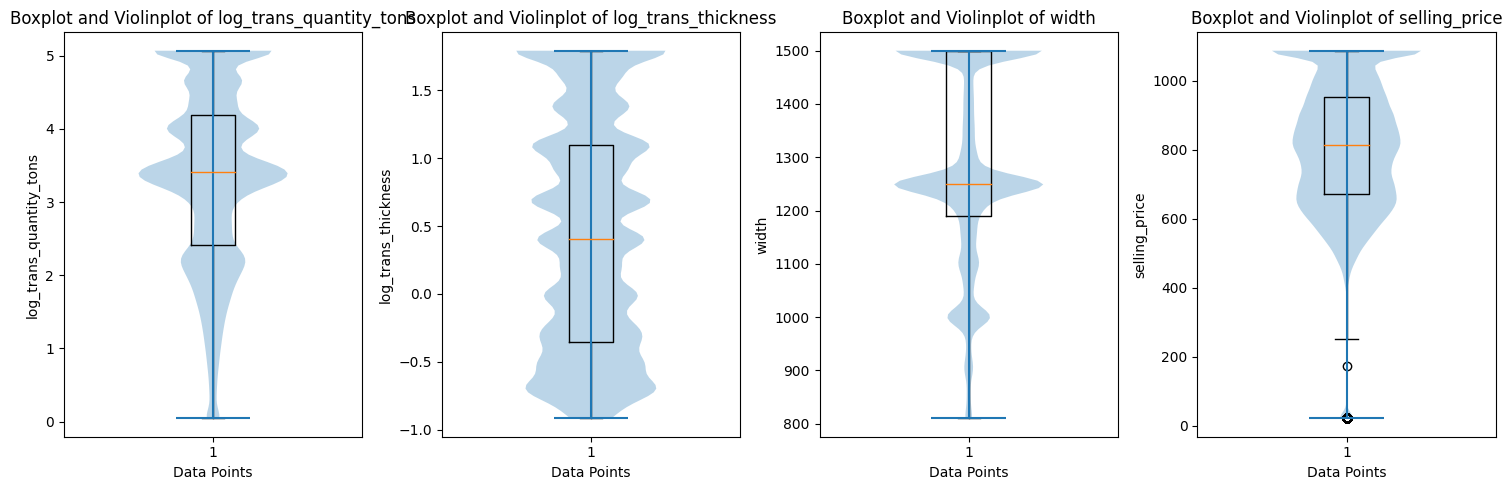

In [ ]:

# Visualize the data distribution after cleanign
# Create a single figure with subplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(log_tran_col, 1):  # Start index from 1
    plt.subplot(1, len(log_tran_col), i)
    plt.boxplot(clipped_data[col])
    plt.violinplot(clipped_data[col])
    plt.title(f'Boxplot and Violinplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

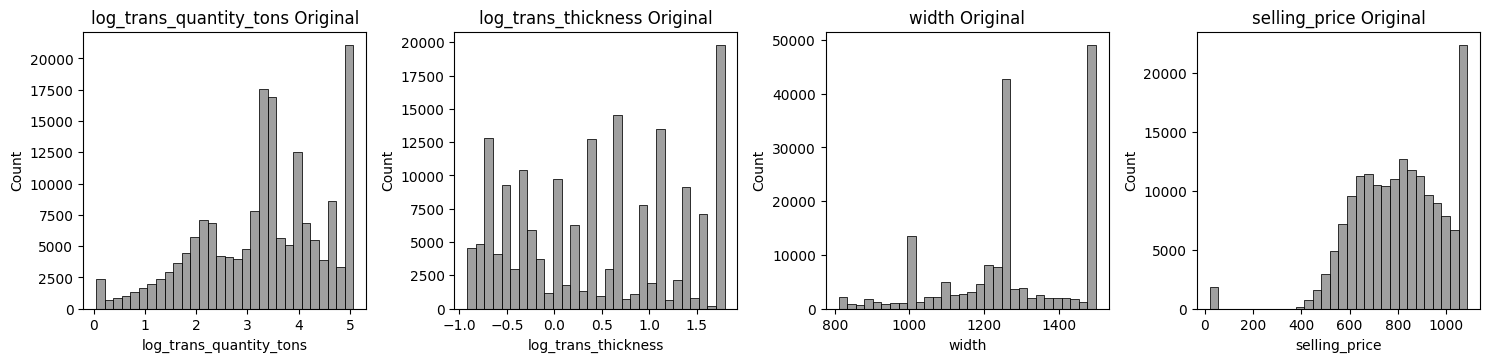

In [ ]:
num_plots = len(log_tran_col)

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_tran_col, 1):

    # Plot original histogram
    plt.subplot(3, num_plots, i)
    sns.histplot(clipped_data[col], kde=False, bins=30, color='grey')
    plt.title(f'{col} Original')

plt.tight_layout()
plt.show()

In [ ]:
clipped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174636 entries, 0 to 181663
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   item_date                174636 non-null  datetime64[ns]
 1   quantity_tons            174636 non-null  float64       
 2   customer_code            174636 non-null  category      
 3   country_code             174636 non-null  category      
 4   status                   174636 non-null  object        
 5   item_type                174636 non-null  object        
 6   application              174636 non-null  category      
 7   thickness                174636 non-null  float64       
 8   width                    174636 non-null  float64       
 9   product_ref              174636 non-null  category      
 10  delivery_date            174636 non-null  datetime64[ns]
 11  selling_price            174636 non-null  float64       
 12  log_trans_quanti

In [ ]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

NameError: name 'df' is not defined

In [ ]:
clipped_data.corr()

<ipython-input-70-0d133b41b5cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clipped_data.corr()


,quantity_tons,thickness,width,selling_price,log_trans_quantity_tons,log_trans_thickness,log_trans_width,log_trans_selling_price
quantity_tons,1.000000,-0.015149,0.000559,-0.046812,0.524381,0.014264,-0.006873,-0.017173
thickness,-0.015149,1.000000,0.325670,-0.295286,0.018027,0.819684,0.372200,-0.153566
width,0.000559,0.325670,1.000000,-0.134649,0.042666,0.334198,0.942154,-0.074939
selling_price,-0.046812,-0.295286,-0.134649,1.000000,-0.030276,-0.408522,-0.153515,0.829297
log_trans_quantity_tons,0.524381,0.018027,0.042666,-0.030276,1.000000,0.043958,0.037858,0.013948
log_trans_thickness,0.014264,0.819684,0.334198,-0.408522,0.043958,1.000000,0.372701,-0.213765
log_trans_width,-0.006873,0.372200,0.942154,-0.153515,0.037858,0.372701,1.000000,-0.085548
log_trans_selling_price,-0.017173,-0.153566,-0.074939,0.829297,0.013948,-0.213765,-0.085548,1.000000


<ipython-input-71-91af4fb1cdc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clipped_data.corr()


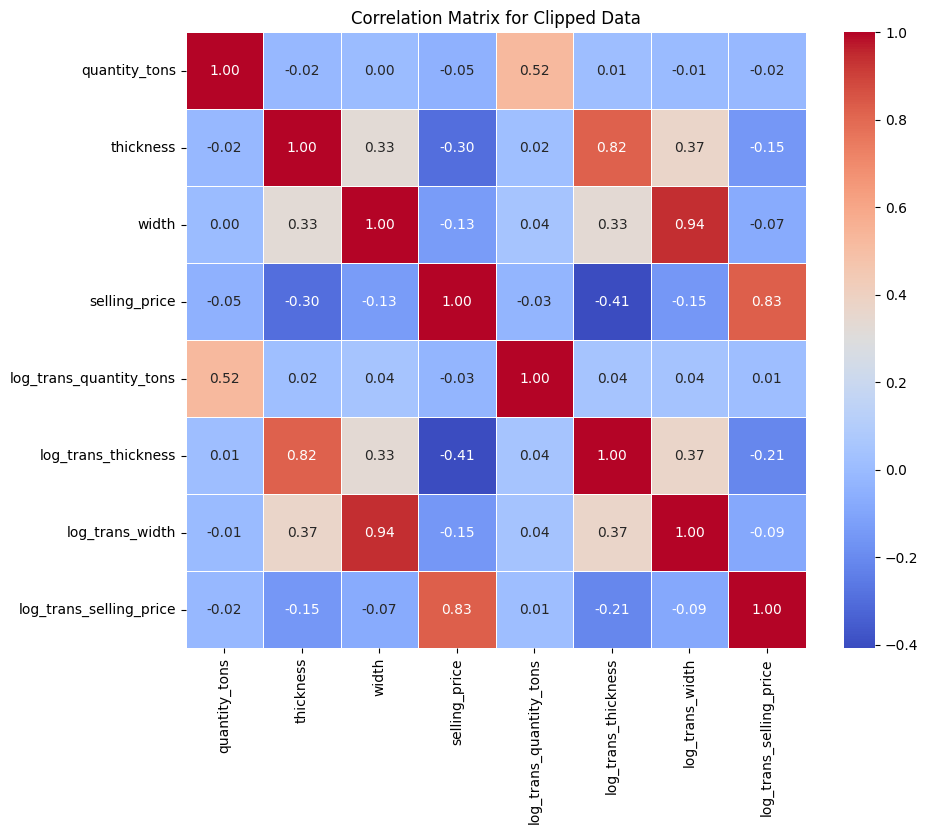

In [ ]:

# Calculate correlation matrix
corr = clipped_data.corr()

# Generate heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            fmt='.2f')

# Decorations
plt.title('Correlation Matrix for Clipped Data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

count                  146209
unique                    249
top       2020-12-02 00:00:00
freq                     2172
first     2020-07-02 00:00:00
last      2021-04-01 00:00:00
Name: item_date, dtype: object


<ipython-input-21-aee5c742b245>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(filtered_data['item_date'].describe())


<Axes: >

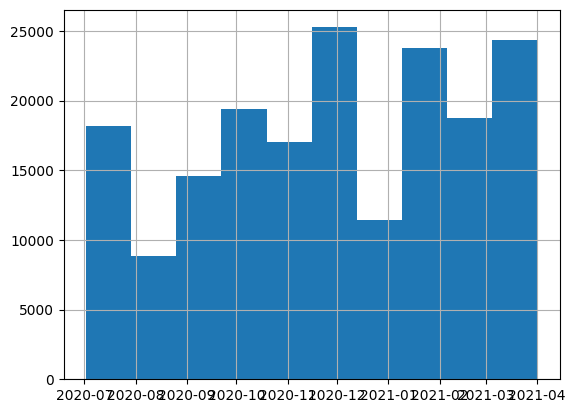

In [ ]:
print(filtered_data['item_date'].describe())
df['item_date'].hist()


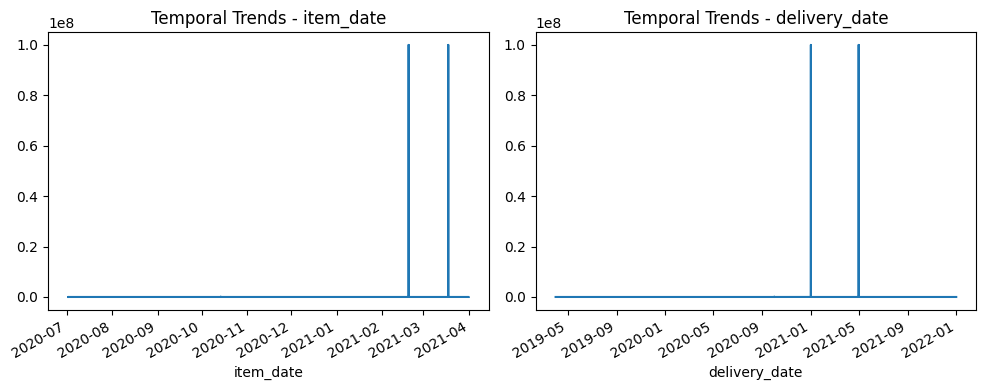

In [ ]:

# Temporal Trends for 'item_date'
plt.subplot(1, 2, 1)
df.set_index('item_date')['selling_price'].plot(figsize=(10, 4))
plt.title('Temporal Trends - item_date')

# Temporal Trends for 'delivery_date'
plt.subplot(1, 2, 2)
df.set_index('delivery_date')['selling_price'].plot(figsize=(10, 4))
plt.title('Temporal Trends - delivery_date')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


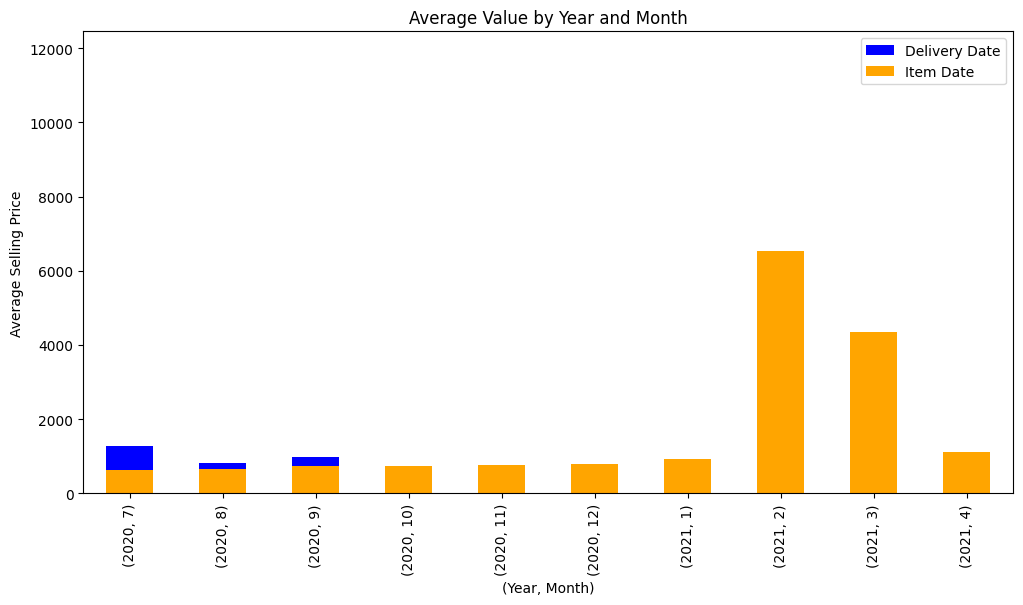

In [ ]:
#Group by year and month for 'delivery_date', then calculate the mean
grouped_data_delivery = df.groupby([df['delivery_date'].dt.year, df['delivery_date'].dt.month])['selling_price'].mean()

# Group by year and month for 'item_date', then calculate the mean
grouped_data_item = df.groupby([df['item_date'].dt.year, df['item_date'].dt.month])['selling_price'].mean()

# Plotting both lines on the same graph with different colors
plt.figure(figsize=(12, 6))
grouped_data_delivery.plot(kind='bar', color='blue', label='Delivery Date')
grouped_data_item.plot(kind='bar', color='orange', label='Item Date')

plt.title('Average Value by Year and Month')
plt.xlabel('(Year, Month)')
plt.ylabel('Average Selling Price')
plt.legend()
plt.show()

Correlation between 'item_date' and 'selling_price': 0.00
Correlation between 'delivery_date' and 'selling_price': 0.00


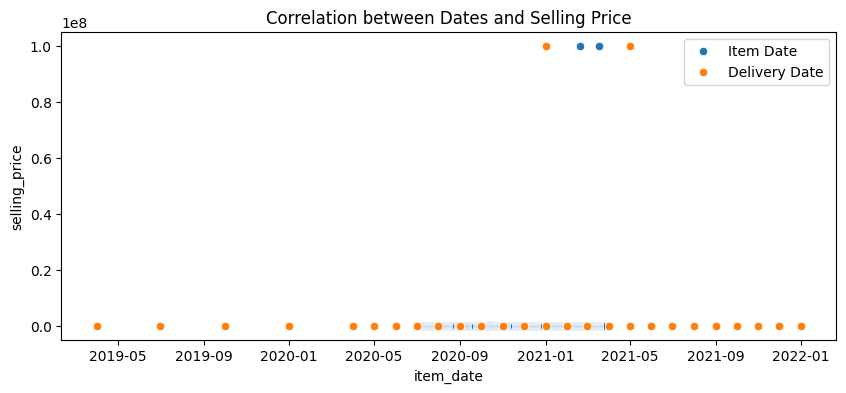

In [ ]:

from scipy.stats import pearsonr


# Calculate the correlation between 'item_date' and 'selling_price'
corr_item_date, _ = pearsonr(df['item_date'].astype(int), df['selling_price'])

# Calculate the correlation between 'delivery_date' and 'selling_price'
corr_delivery_date, _ = pearsonr(df['delivery_date'].astype(int), df['selling_price'])

# Print correlation coefficients
print(f"Correlation between 'item_date' and 'selling_price': {corr_item_date:.2f}")
print(f"Correlation between 'delivery_date' and 'selling_price': {corr_delivery_date:.2f}")

# Plotting (if needed)
plt.figure(figsize=(10, 4))
sns.scatterplot(x='item_date', y='selling_price', data=df, label='Item Date')
sns.scatterplot(x='delivery_date', y='selling_price', data=df, label='Delivery Date')
plt.title('Correlation between Dates and Selling Price')
plt.legend()
plt.show()


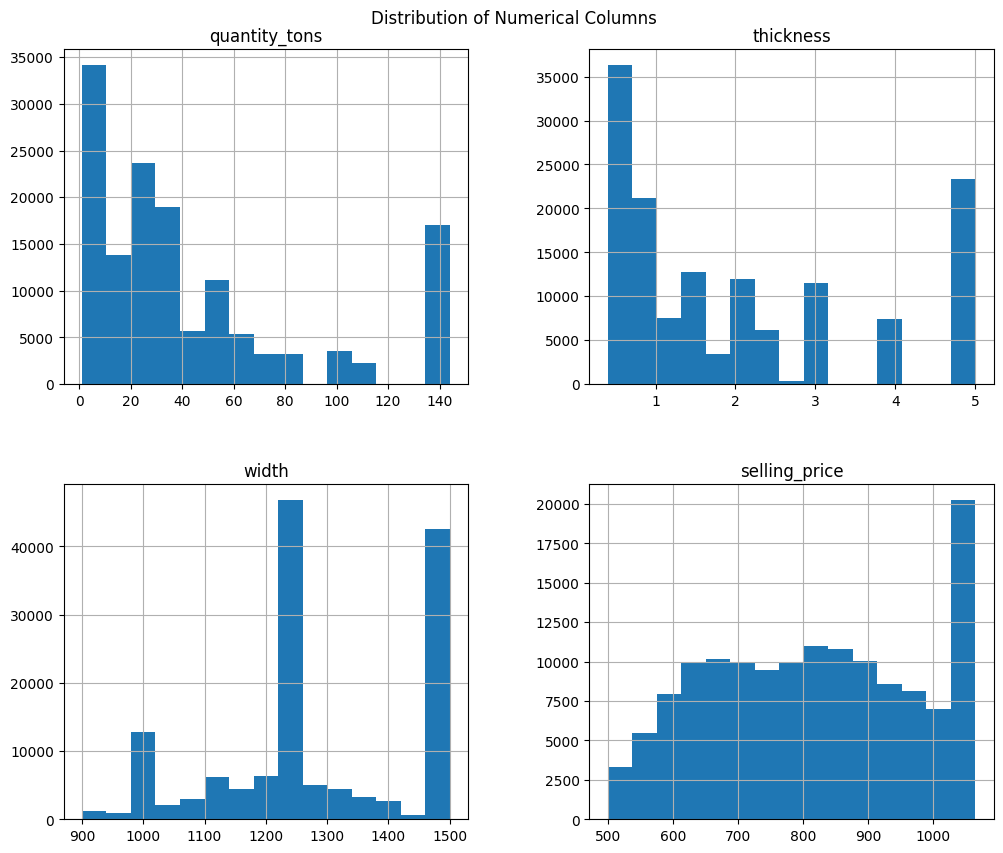

In [ ]:
# Visualize distribution of numerical columns
numeric_cols = filtered_data.select_dtypes(include=[np.number]).columns
filtered_data[numeric_cols].hist(bins=15, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Columns', y=0.92)
plt.show()


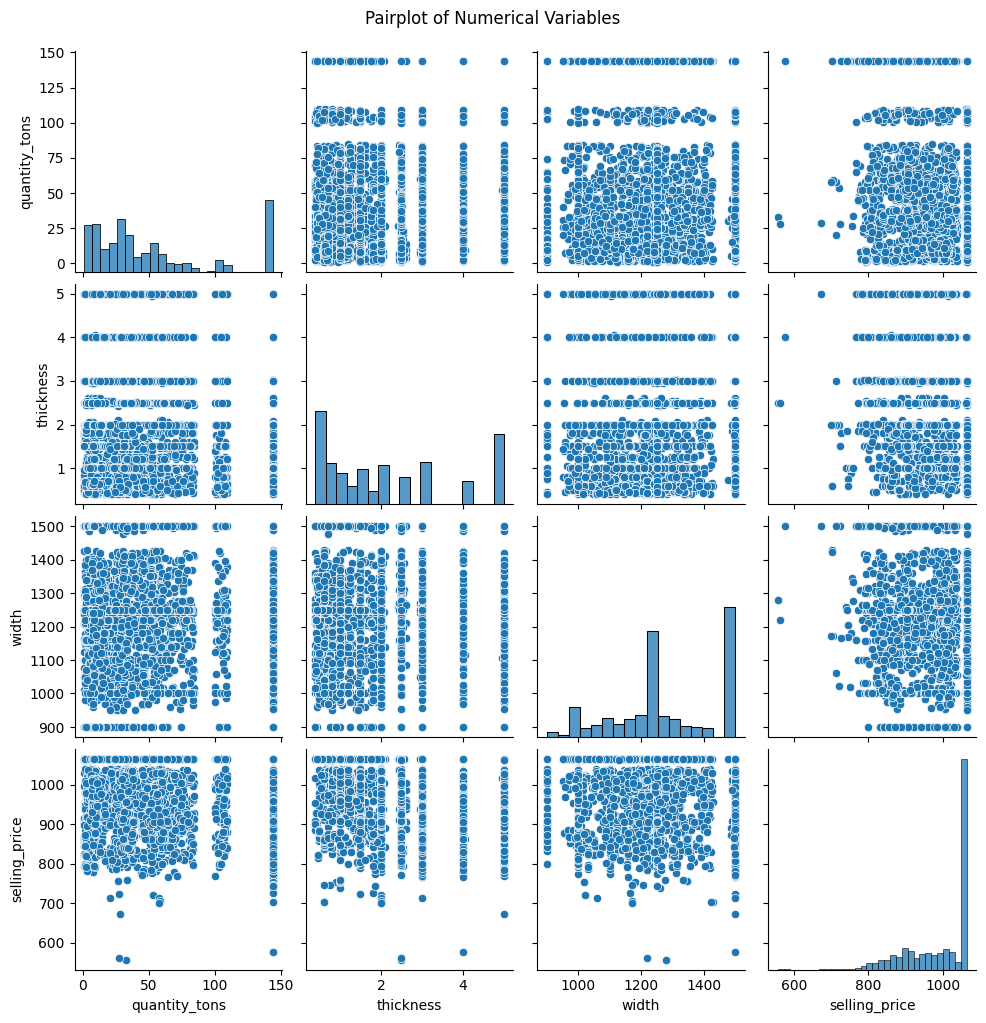

In [ ]:
# Visualize relationships between numerical variables
sns.pairplot(filtered_data[numeric_cols].head(5000))
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [ ]:
df1 = filtered_data.copy()

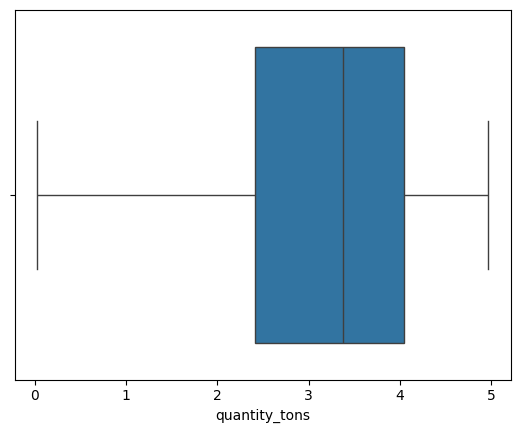

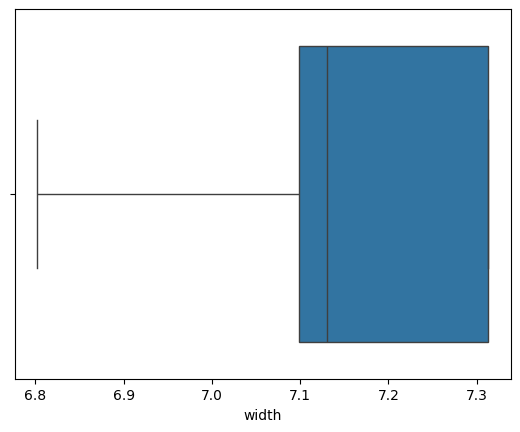

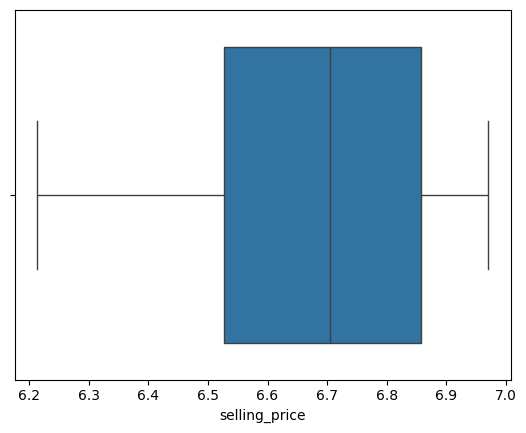

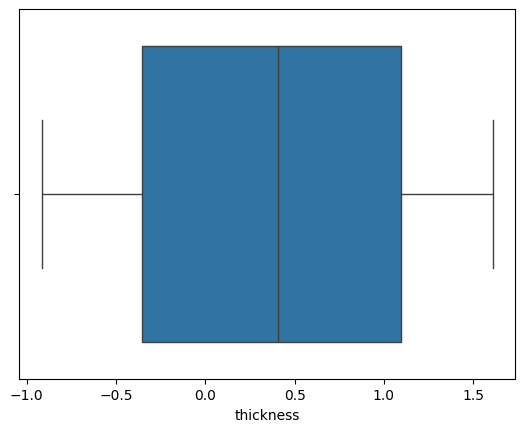

In [ ]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great
# effect on the data, so no need to apply for that columns

df1['quantity_tons'] = np.log(filtered_data['quantity_tons'])
sns.v(x='quantity_tons', data=df1)
plt.show()

df1['width'] = np.log(filtered_data['width'])
sns.boxplot(x='width', data=df1)
plt.show()

df1['selling_price'] = np.log(filtered_data['selling_price'])
sns.boxplot(x='selling_price', data=df1)
plt.show()

df1['thickness'] = np.log(filtered_data['thickness'])
sns.boxplot(x='thickness', data=df1)
plt.show()

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

# Display the list of categorical columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['customer_code', 'country_code', 'status', 'item_type', 'application',
       'product_ref'],
      dtype='object')


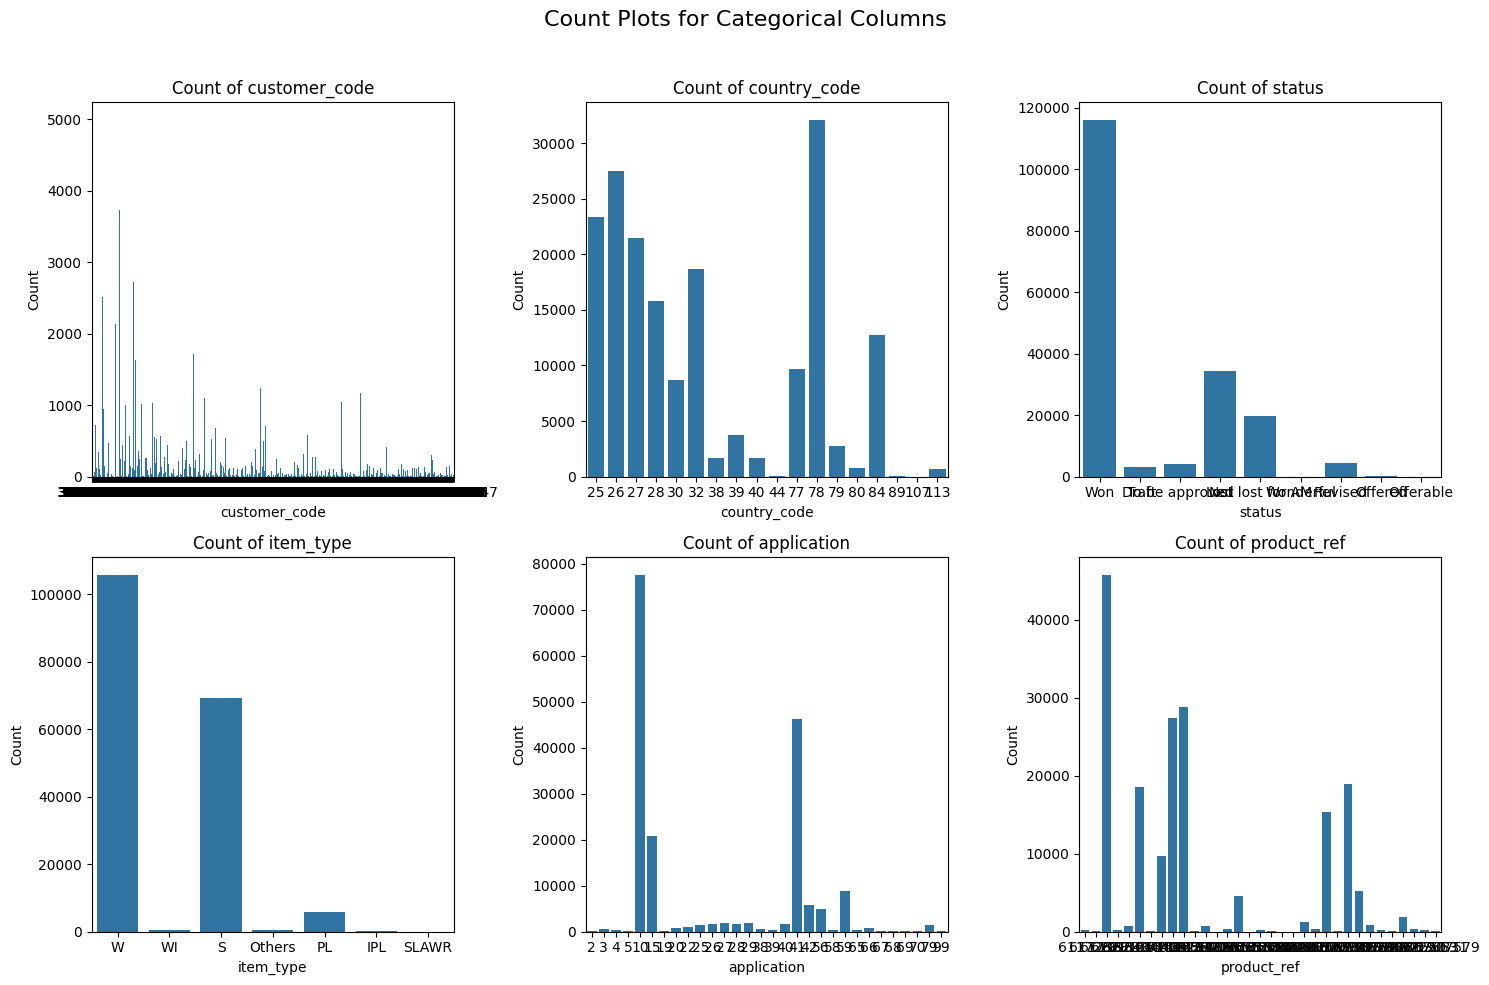

In [ ]:

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Count Plots for Categorical Columns', fontsize=16)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title from being cut off
plt.show()


<ipython-input-22-5ced0a3055e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_data.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)


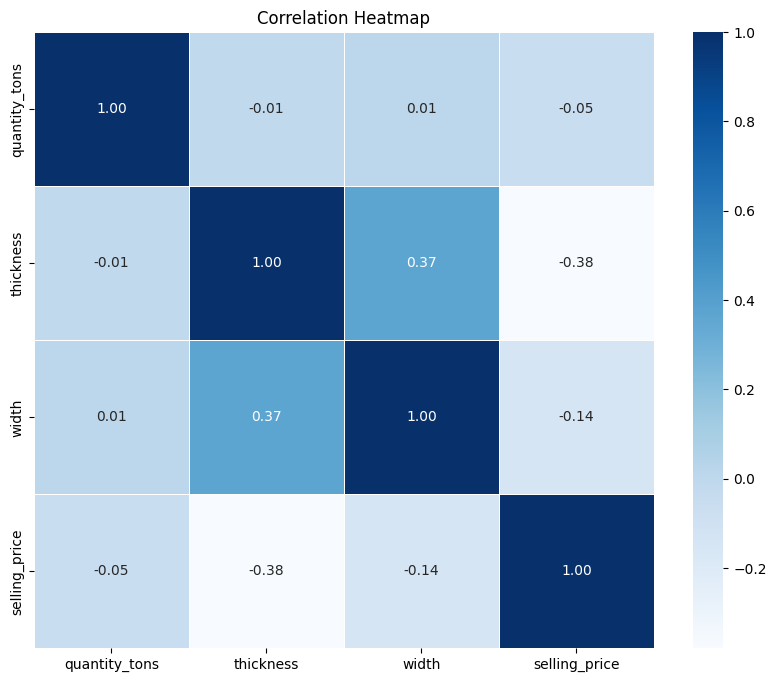

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


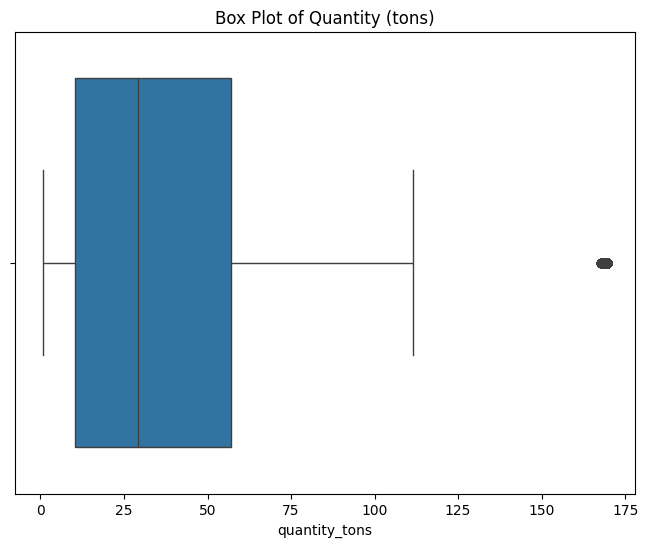

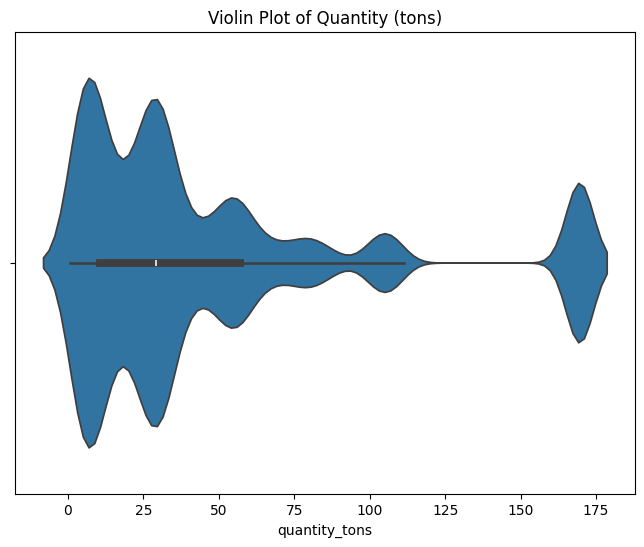

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quantity_tons', data=filtered_data)
plt.title('Box Plot of Quantity (tons)')
plt.show()

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='quantity_tons', data=filtered_data)
plt.title('Violin Plot of Quantity (tons)')
plt.show()

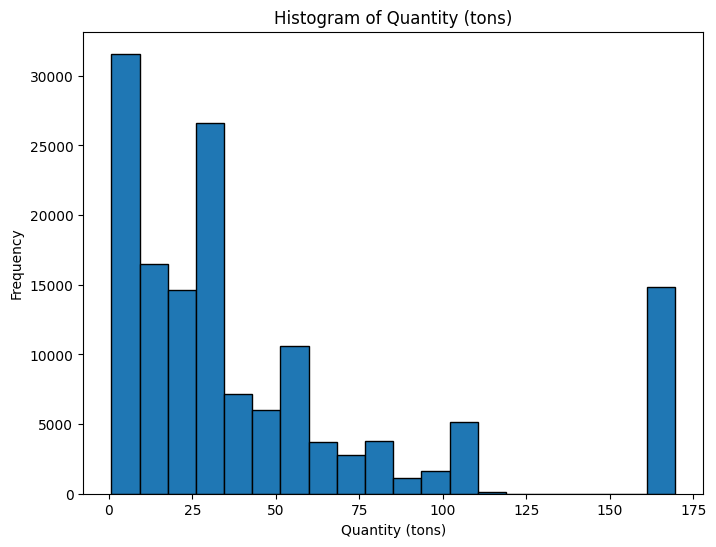

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(filtered_data['quantity_tons'], bins=20, edgecolor='black')
plt.title('Histogram of Quantity (tons)')
plt.xlabel('Quantity (tons)')
plt.ylabel('Frequency')
plt.show()


In [ ]:


# Function to treat outliers using IQR or Isolation Forest
def treat_outliers(data, method='iqr'):
    if method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    elif method == 'isolation_forest':
        clf = IsolationForest(contamination=0.05, random_state=42)
        data = data.values.reshape(-1, 1)
        outliers = clf.fit_predict(data)
        data_outliers_removed = data[outliers == 1].reshape(1, -1)[0]
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'isolation_forest'")
    return data_outliers_removed

# Function to identify and treat skewness using log transformation
def treat_skewness(data):
    skewed_cols = data.apply(lambda x: skew(x))
    skewed_cols = skewed_cols[abs(skewed_cols) > 0.5]  # Adjust the threshold as needed

    for col in skewed_cols.index:
        data[col] = np.log1p(data[col])

# Identify and treat skewness using log transformation
treat_skewness(df)
# Example usage:
# Assuming 'df' is your DataFrame

# Treat outliers using IQR
df_cleaned_iqr = df.apply(treat_outliers, method='iqr')

# Treat outliers using Isolation Forest
df_cleaned_isolation_forest = df.apply(treat_outliers, method='isolation_forest')



# Now, 'df' contains the cleaned data with outliers treated and skewness reduced.
